# 1. Connect to github classroom

Some of the assignments in this unit will be managed via GitHub classroom. Please follow these steps to connect:

1. Follow this invitation link and accept the invitation: https://classroom.github.com/a/Q6rdXLQ7
2. The link may ask you to sign in to GitHub (if you haven't signed in earlier). If you don't have a GitHub account, you will need to register.
3. Once you have logged in with GitHub, you may need to select your email address to associate your GitHub account with your email address (if you haven't done it in a previous COMP3420 activity). If you can't find your email address, please skip this step and contact diego.molla-aliod@mq.edu.au so that he can do the association manually.
4. Wait a minute or two, and refresh the browser until it indicates that your assignment repository has been created. Your repository is private to you, and you have administration privileges. Only you and the lecture will have access to it. The repository will be listed under the list of repositories belonging to this offering of COMP3420: https://github.com/orgs/COMP3420-2023S1/repositories
5. Your assignment repository will include starter code that you can use for the exercises below. Clone your repository into a folder in your computer.

This practical has two kinds of exercises:

1. **Implement functions and upload the implementation to github classroom**. The exercises will have associated automated tests. To run these tests, please commit your changes and push the changes to your repository. This will initiate the automated tests, and you will receive the test results. There are no marks associated with these tests, but they will help you get used to the environment that you will use for the assignments.
2. **Analyse the data, train and evaluate image classifiers.** These exercises do not have automated tests but they will help you practice with the kinds of tasks that you will need to do in assignments 2 and 3.


# 2. Classify digits using the MNIST dataset

For the exercises of this section, we will use the MNIST dataset. This dataset is already available in Keras.

## 2.1 Count labels

Write a function `summary_mnist` that returns the counts of labels in the training set and the test set. The function receives the followinng:
  - `train_labels`: the list of labels from the training set, as provided by the call `mnist.load_data()`.
  - `test_labels`: the list of labels from the test dataset, again as provided by the call `mnist.load_data()`.
  - `labels_list`: the list of unique labels from the dataset.
  The output must be a Python dictionary with the following two items:
  -  `"train_labels_counts"`: The counts of occurrences in `train_labels` for each label listed in `labels_list`.
  -  `"test_labels_counts"`: The counts of occurrences in `test_labels` for each label listed in `labels_list`.

An example of usage of this function is:

In [1]:
import week2
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
labels_counts = week2.summary_mnist(train_labels, test_labels, range(10))
labels_counts

2023-02-24 13:42:38.770714: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


{'train_labels_counts': [5923,
  6742,
  5958,
  6131,
  5842,
  5421,
  5918,
  6265,
  5851,
  5949],
 'test_labels_counts': [980, 1135, 1032, 1010, 982, 892, 958, 1028, 974, 1009]}

This means that label 0 has a count of 6742 in the training data and 980 in the test data, and so on with labels 1, 2, ... 9. With this information you can, for example, do these plots:

Text(0.5, 1.0, 'Counts of labels in the training data')

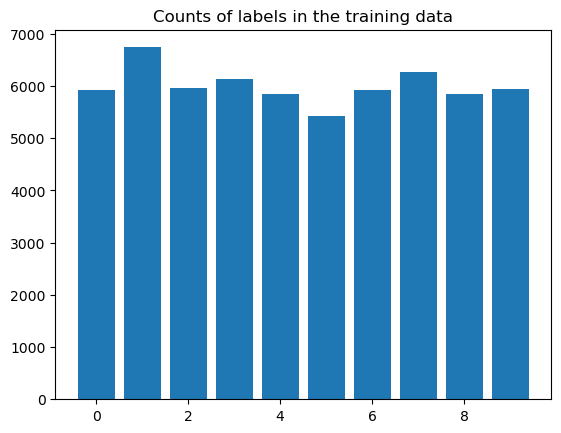

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.bar(range(10), labels_counts['train_labels_counts'])
plt.title("Counts of labels in the training data")

Text(0.5, 1.0, 'Counts of labels in the test data')

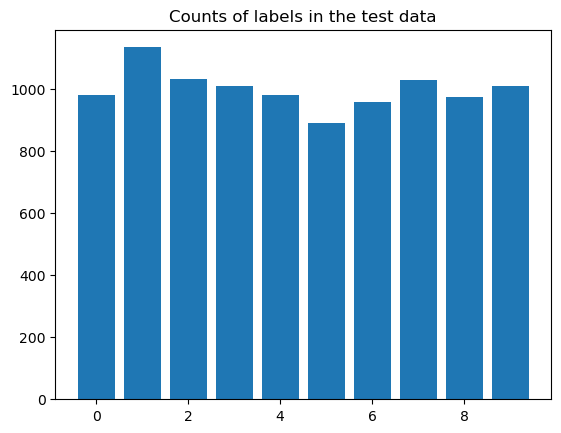

In [3]:
plt.bar(range(10), labels_counts['test_labels_counts'])
plt.title("Counts of labels in the test data")

 

Answer the following questions:

1. Are the data balanced? (in other words, do all labels have a similar number of counts?)
2. Do the train and test data have similar distributions of labels?



## 2.2 Classify digits

Write a function `build_mnist_model` that returns a Keras model to classify the MNIST data. The resulting model must contain a hidden layer, followed by a dropout layer (optional), and the final classification layer. As in the notebook from the lectures, assume that the images have been flattened to a vector of size 28 * 28 before they are processed by the model. Make sure that the first layer specifies the correct input shape, and the last layer has the correct size and activation function.

The function has the following parameters:
- `hidden_size`: size of the hidden layer.
- `hidden_activation`: activation of the hidden layer.
- `droput_rate`: Dropout rate of the dropout layer (which is placed after the hidden layer). If the dropout rate is zero, there should be no dropout layer.

An example of usage of this function is:

In [4]:
import week2
mnist_model = week2.build_mnist_model(64, 'relu', 0.4)
mnist_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


2023-02-24 13:42:40.425054: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-24 13:42:40.426070: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


With the help of this function, try different parameters and determine what is the optimal architecture. Feel free to use `keras-tuner` as we have seen in the lecture notebooks. Answer the following questions:

1. What are the optimal hyperparameters?
2. Does the model overfit? How can you determine whether it is overfitting?

# 3. Classify flowers

Write a function `build_flowers_model` that returns a Keras model to classify the flowers data.

Download an unzip the flowers data:
   - [flower_photos.zip](https://drive.google.com/file/d/1pZNVfvi9iJRjS6fXFF3om7pp8Gp-AZtM/view?usp=share_link)

The resulting model must contain 1 or more hidden layers, where each hidden layer is followed by a dropout layer (optional), and the final classification layer. As in the notebook from the lectures, assume that the images have **not** been flattened they are processed by the model, so the model mush have a `Flatten` layer. Make sure that the first layer specifies the correct input shape, and the last layer has the correct size and activation function.

The function has the following parameters:
- `num_hidden`: the number of hidden layers.
- `hidden_size`: size of each hidden layer. The activation of each hidden layer should be `"relu"`.
- `droput_rate`: Dropout rate of the dropout layers. If the dropout rate is zero, there should be no dropout layers.

An example of usage of this function is:

In [5]:
import week2
flowers_model = week2.build_flowers_model(2, 128, 0.4)
flowers_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense_2 (Dense)             (None, 128)               19267712  
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 6)                 774       
                                                                 
Total params: 19,284,998
Trainable params: 19,284,998


With the help of this function, try different parameters and determine what is the optimal architecture. Again, feel free to use `keras-tuner` as we have seen in the lecture notebooks. Answer the following questions:

1. What are the optimal hyperparameters?
2. Does the model overfit? How can you determine whether it is overfitting?